In [147]:
from sklearn import datasets

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns

%matplotlib notebook

In [148]:
wine=datasets.load_wine()

In [149]:
df=pd.DataFrame(wine["data"], columns=wine["feature_names"])
df["target"]=wine["target"]
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [150]:
df.shape

(178, 14)

In [151]:
df.isna().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

In [152]:
x=df
y=x.pop("target")

In [153]:
x.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [154]:
x.shape

(178, 13)

In [155]:
y.unique()

array([0, 1, 2])

In [156]:
#Train Classifier

In [157]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 55)

In [158]:
x_train.shape

(142, 13)

In [159]:
x_test.shape

(36, 13)

In [160]:
#Define the KNN model

In [161]:
knn= KNeighborsClassifier(n_neighbors=5)

In [162]:
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [163]:
knn.score(x_test, y_test)

0.6388888888888888

In [164]:
#Tuning Sensitivity of Model To n_neighbors

<IPython.core.display.Javascript object>


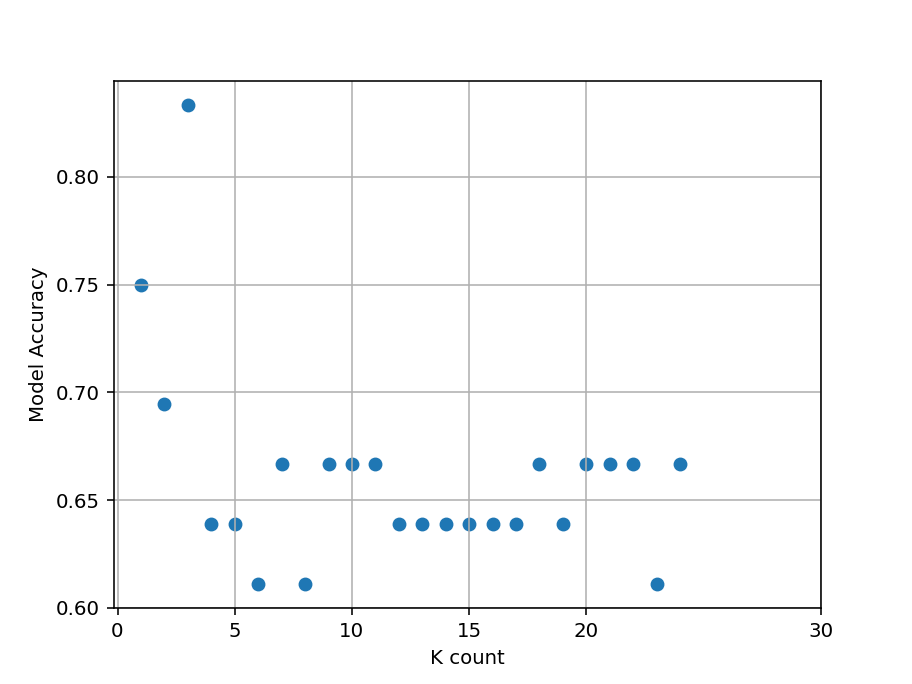

[]


In [165]:
k_range = range(1,25)
scores=[]

for k in k_range:
    knn= KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    scores.append(knn.score(x_test, y_test))
    
plt.figure()
plt.xlabel("K count")
plt.ylabel("Model Accuracy")
plt.scatter(k_range, scores)
plt.grid()
plt.xticks([0, 5, 10, 15, 20, 30])
plt.show()
print(score)

<IPython.core.display.Javascript object>


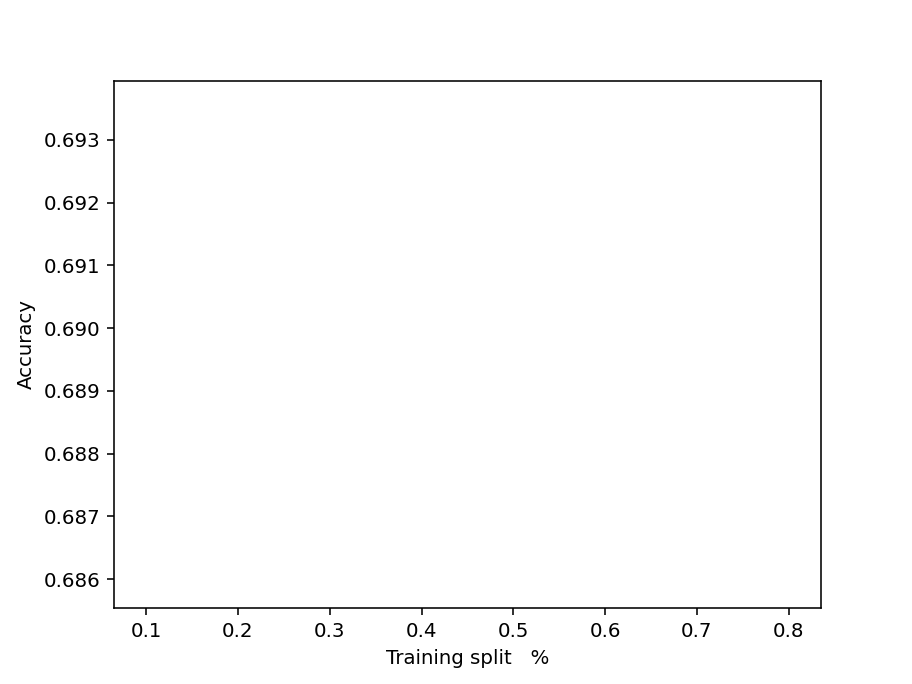

In [166]:
test_sizes= [0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1]
knn= KNeighborsClassifier(n_neighbors=5)

plt.figure()

for test_size in test_sizes:
    score=[]
    
    for i in range(1,1000):
        x_train, x_test, y_train, y_test=train_test_split(x, y, test_size = 1-test_size)
        knn.fit(x_train, y_train)
        scores.append(knn.score(x_test, y_test))
        
    plt.plot(test_size, np.mean(scores))
        
plt.xlabel("Training split   %")
plt.ylabel("Accuracy")


plt.xticks([0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1])
plt.show()
    


In [167]:
#Make Predictions

In [168]:
prediction = knn.predict(x_test)


In [169]:
prediction

array([2, 2, 0, 2, 2, 0, 0, 0, 1, 1, 1, 2, 1, 1, 0, 0, 1, 2, 1, 2, 2, 2,
       0, 2, 1, 1, 1, 2, 2, 0, 1, 1, 1, 1, 2, 1, 0, 2, 0, 2, 0, 0, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 1, 0, 2, 0, 1, 2, 0, 0, 1, 0, 0, 1, 2, 2, 2,
       2, 0, 2, 1, 2, 2, 0, 2, 2, 2, 1, 0, 1, 0, 1, 0, 1, 2, 2, 2, 2, 0,
       0, 1, 0, 1, 0, 0, 2, 2, 1, 2, 1, 2, 1, 0, 1, 1, 1, 2, 0, 1, 2, 2,
       2, 2, 2, 2, 2, 0, 2, 1, 2, 0, 1, 2, 1, 2, 1, 0, 2, 0, 2, 0, 0, 2,
       0, 2, 2, 2, 2, 0, 1, 1, 0, 2, 0, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2,
       0, 2, 2, 0, 0, 0, 1])

In [170]:
cm=confusion_matrix(y_test, prediction)

In [171]:
cm

array([[42,  0, 13],
       [ 2, 39, 22],
       [ 0, 10, 33]], dtype=int64)

<IPython.core.display.Javascript object>


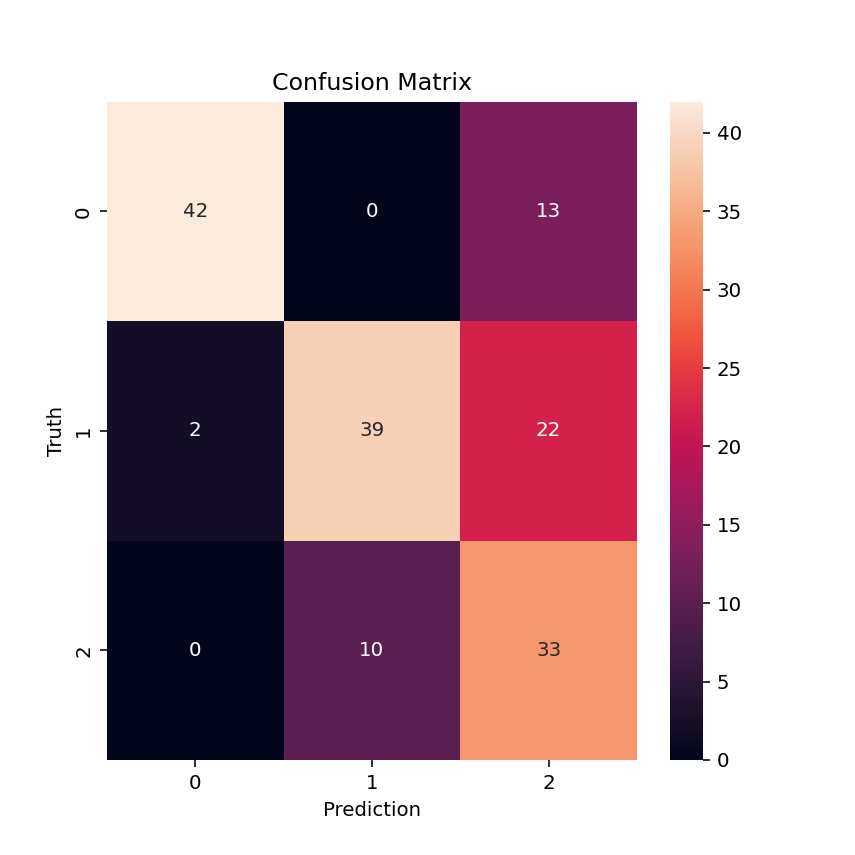

Text(0.5, 36.72222222222221, 'Prediction')

In [172]:
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True)
plt.title("Confusion Matrix")
plt.ylabel("Truth")
plt.xlabel("Prediction")
